# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# api test
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q=paris"
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 281.34,
  'feels_like': 280.69,
  'temp_min': 280.03,
  'temp_max': 282.03,
  'pressure': 1032,
  'humidity': 93,
  'sea_level': 1032,
  'grnd_level': 1022},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 280},
 'clouds': {'all': 100},
 'dt': 1731302489,
 'sys': {'type': 2,
  'id': 2012208,
  'country': 'FR',
  'sunrise': 1731308033,
  'sunset': 1731341735},
 'timezone': 3600,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | taroudant
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | nar'yan-mar
Processing Record 12 of Set 1 | mejit
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | muroto-misakicho
Processing Record 15 of Set 1 | westport
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | paso de los toros
Processing Record 18 of Set 1 | tangalle
Processing Record 19 of Set 1 | coxim
Processing Record 20 of Set 1 | toliara
Processing Record 21 of Set 1 | sitangkai
Processing Record 22 of

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,296.59,92,100,8.75,US,1731303194
1,port-aux-francais,-49.3500,70.2167,278.21,87,74,8.54,TF,1731303304
2,grytviken,-54.2811,-36.5092,271.89,88,100,1.07,GS,1731303305
3,gadzhiyevo,69.2551,33.3362,276.48,73,100,7.39,RU,1731303306
4,edinburgh of the seven seas,-37.0676,-12.3116,289.33,90,93,16.46,SH,1731303307


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,296.59,92,100,8.75,US,1731303194
1,port-aux-francais,-49.3500,70.2167,278.21,87,74,8.54,TF,1731303304
2,grytviken,-54.2811,-36.5092,271.89,88,100,1.07,GS,1731303305
3,gadzhiyevo,69.2551,33.3362,276.48,73,100,7.39,RU,1731303306
4,edinburgh of the seven seas,-37.0676,-12.3116,289.33,90,93,16.46,SH,1731303307


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

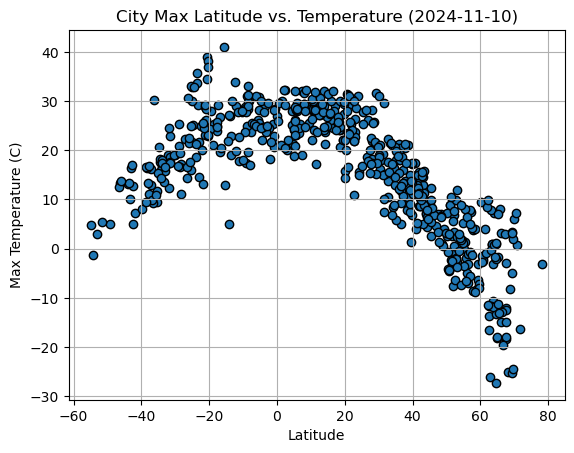

In [14]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']-273.15
plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-11-10)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

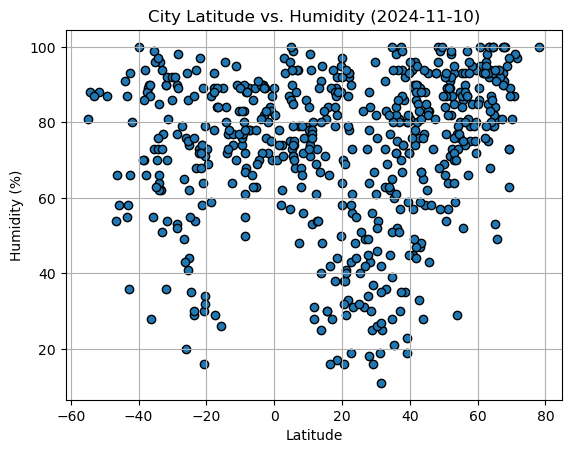

In [15]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2024-11-10)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

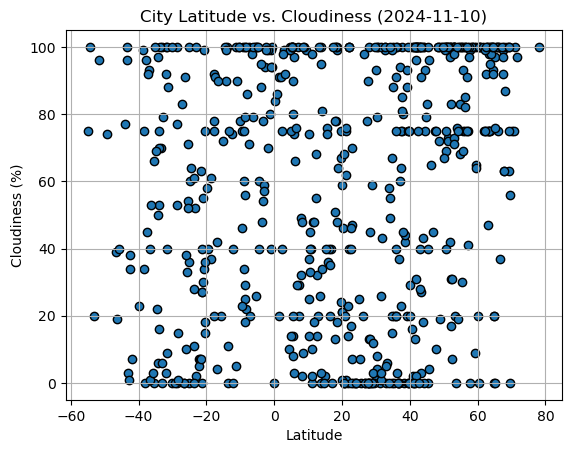

In [16]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-11-10)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

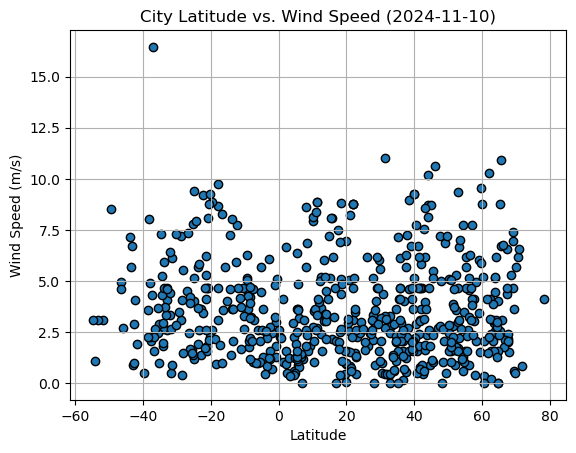

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2024-11-10)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(dataframe, x_values, y_values):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")

    # Return slope, intercept, and line equation for further use
    return slope, intercept, line_eq

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,296.59,92,100,8.75,US,1731303194
3,gadzhiyevo,69.2551,33.3362,276.48,73,100,7.39,RU,1731303306
5,klyuchi,52.2667,79.1667,272.39,98,100,3.59,RU,1731303308
6,taroudant,30.4703,-8.8770,291.09,46,8,1.00,MA,1731303309
10,nar'yan-mar,67.6713,53.0870,261.06,90,63,2.15,RU,1731303314


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,278.21,87,74,8.54,TF,1731303304
2,grytviken,-54.2811,-36.5092,271.89,88,100,1.07,GS,1731303305
4,edinburgh of the seven seas,-37.0676,-12.3116,289.33,90,93,16.46,SH,1731303307
7,puerto natales,-51.7236,-72.4875,278.51,88,96,3.10,CL,1731303310
8,waitangi,-43.9535,-176.5597,286.38,91,77,7.15,NZ,1731303312


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7850681860131936


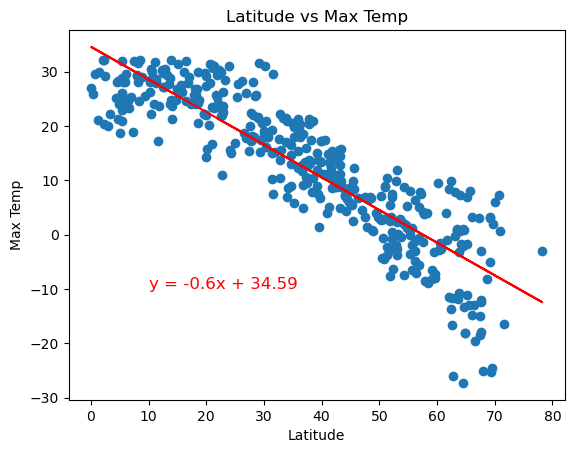

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']-273.15

slope_north, intercept_north, line_eq_north = create_linear_regression_plot(northern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_north,(10,-10),fontsize=12,color="red")
plt.title(f"Latitude vs Max Temp")

# Show plot
plt.show()

The r^2-value is: 0.4223182211837731


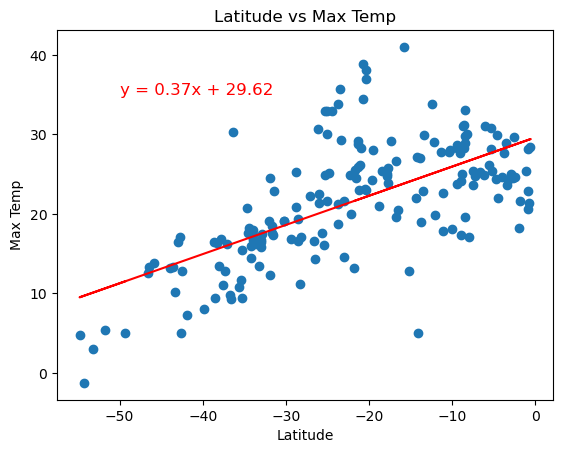

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']-273.15

slope_south, intercept_south, line_eq_south = create_linear_regression_plot(southern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_south,(-50,35),fontsize=12,color="red")
plt.title(f"Latitude vs Max Temp")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
<br>northern hemisphere r^2: 0.7850681860131936
<br>northern hemisphere r (correlation coefficient): 0.88604073609
<br>Based on the correlation coefficient, there is a very strong negative relationship between latitude and maximum temperature in the northern hemisphere.
<br>southern hemisphere r^2: 0.4223182211837731
<br>southern hemisphere r (correlation coefficient): 0.64986015509
<br>Based on the correlation coefficient, there is a stong positive relationship present between latitude and maximum temperature in the southern hemisphere.
<br>This means that as you go further from the equator (higher in the northern hemisphere and a latitude further from 0), the maximum temperature is lower and it is colder, and as you go closer to the equator (from the bottom of the southern hemisphere and closer to a latitude of 0), the maximum temperature is higher and it is hotter.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.08309295909873027


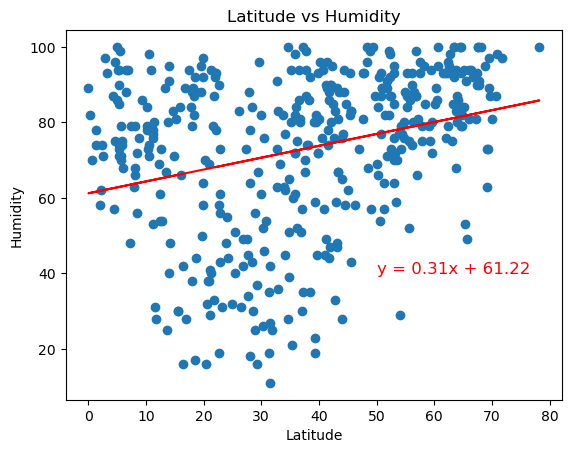

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope_north, intercept_north, line_eq_north = create_linear_regression_plot(northern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_north,(50,40),fontsize=12,color="red")
plt.title(f"Latitude vs Humidity")

# Show plot
plt.show()

The r^2-value is: 0.0043958747616381945


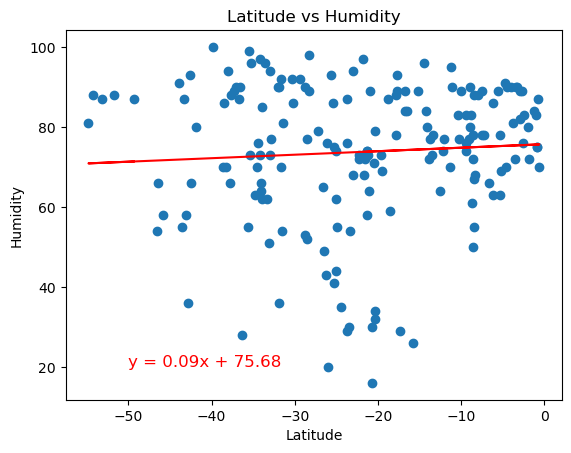

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope_south, intercept_south, line_eq_south = create_linear_regression_plot(southern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_south,(-50,20),fontsize=12,color="red")
plt.title(f"Latitude vs Humidity")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
<br>northern hemisphere r^2: 0.08309295909873027
<br>northern hemisphere r (correlation coefficient): 0.28825849354
<br>Based on the correlation coefficient, there is a very weak positive relationship between latitude and humidity in the northern hemisphere.
<br>southern hemisphere r^2: 0.0043958747616381945
<br>southern hemisphere r (correlation coefficient): 0.06630139336
<br>Based on the correlation coefficient, there is no relationship present between latitude and humidity in the southern hemisphere.
<br>This means that the humidity is not predictable and is not affected as you go further from the equator (higher in the northern hemisphere and a latitude further from 0)and as you go closer to the equator (from the bottom of the southern hemisphere and closer to a latitude of 0).

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0824745389313424


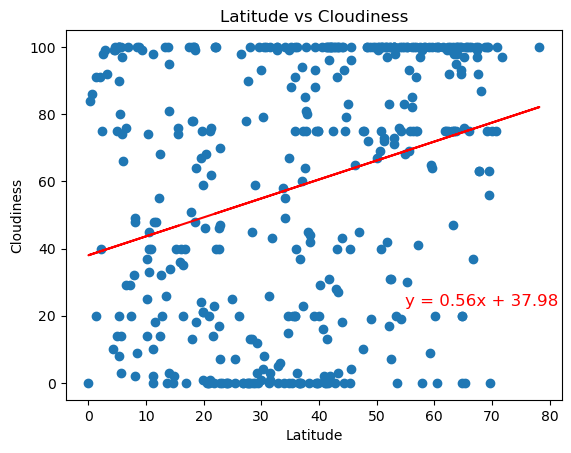

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope_north, intercept_north, line_eq_north = create_linear_regression_plot(northern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_north,(55,23),fontsize=12,color="red")
plt.title(f"Latitude vs Cloudiness")

# Show plot
plt.show()

The r^2-value is: 0.04836092573055254


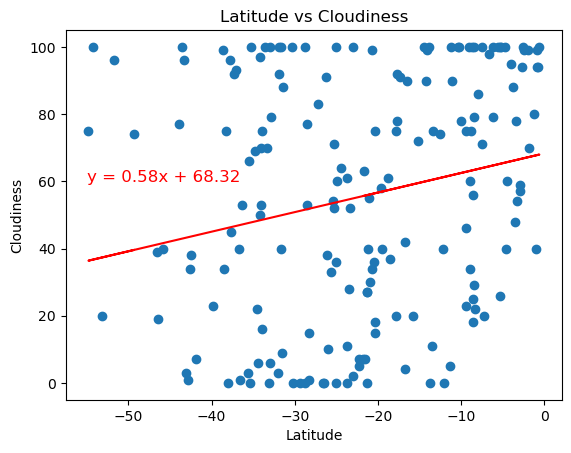

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope_south, intercept_south, line_eq_south = create_linear_regression_plot(southern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_south,(-55,60),fontsize=12,color="red")
plt.title(f"Latitude vs Cloudiness")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
<br>northern hemisphere r^2: 0.0824745389313424
<br>northern hemisphere r (correlation coefficient): 0.28718380687
<br>Based on the correlation coefficient, there is a weak positive relationship between latitude and cloudiness in the northern hemisphere.
<br>southern hemisphere r^2: 0.04836092573055254
<br>southern hemisphere r (correlation coefficient): 0.21991117691
<br>Based on the correlation coefficient, there is a weak positive relationship present between latitude and cloudiness in the southern hemisphere.
<br>This means that the cloudiness is not predictable and is not affected as you go further from the equator (higher in the northern hemisphere and a latitude further from 0)and as you go closer to the equator (from the bottom of the southern hemisphere and closer to a latitude of 0).

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0063197263388521455


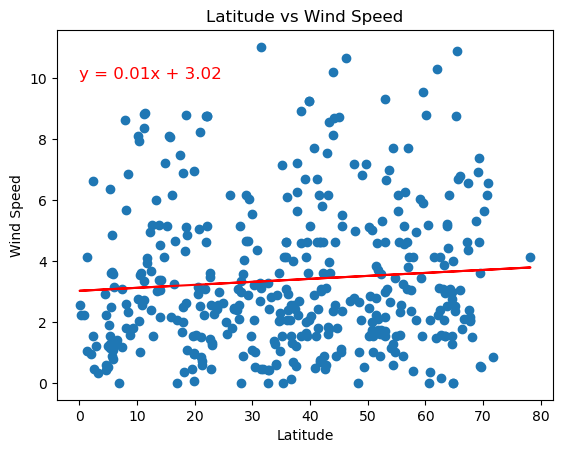

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope_north, intercept_north, line_eq_north = create_linear_regression_plot(northern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_north,(0,10),fontsize=12,color="red")
plt.title(f"Latitude vs Wind Speed")

# Show plot
plt.show()

The r^2-value is: 0.014655479902518675


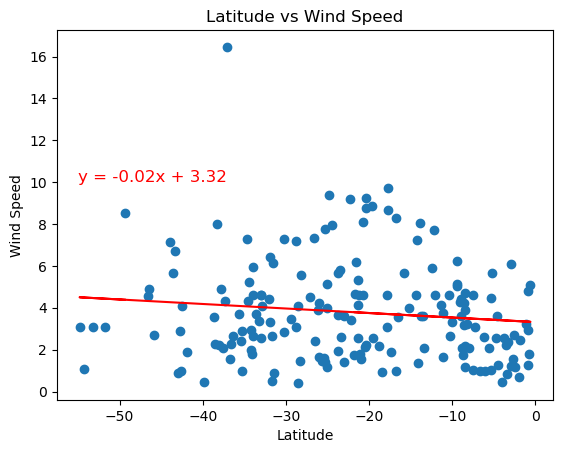

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope_south, intercept_south, line_eq_south = create_linear_regression_plot(southern_hemi_df, x_values, y_values)

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_south,(-55,10),fontsize=12,color="red")
plt.title(f"Latitude vs Wind Speed")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
<br>northern hemisphere r^2: 0.0063197263388521455
<br>northern hemisphere r (correlation coefficient): 0.07949670646
<br>Based on the correlation coefficient, there is a no relationship between latitude and wind speed in the northern hemisphere.
<br>southern hemisphere r^2: 0.014655479902518675
<br>southern hemisphere r (correlation coefficient): 0.12105981952
<br>Based on the correlation coefficient, there is a no relationship present between latitude and wind speed in the southern hemisphere.
<br>This means that the wind speed is not predictable and is not affected as you go further from the equator (higher in the northern hemisphere and a latitude further from 0)and as you go closer to the equator (from the bottom of the southern hemisphere and closer to a latitude of 0).